# Question 3.1 - Feature Preprocessing

In [6]:
#Loading Data

import pandas as pd

fpath = './insurance_data.csv'
insurance_data = pd.read_csv(fpath)

one_hot_data = pd.get_dummies(insurance_data)

print(type(one_hot_data))
print(one_hot_data)
print(list(one_hot_data.columns))

x_vals = one_hot_data.loc[:, one_hot_data.columns != 'charges']
y_vals = one_hot_data.loc[:, one_hot_data.columns == 'charges']

X = x_vals.values
y = y_vals.values

#print("X:", X)
#print("y:", y)
#print("len(X):", len(X))
#print("len(y):", len(y))

<class 'pandas.core.frame.DataFrame'>
      ft1     ft2  ft3      charges  ft4_female  ft4_male  ft5_no  ft5_yes  \
0      19  27.900    0  16884.92400           1         0       0        1   
1      18  33.770    1   1725.55230           0         1       1        0   
2      28  33.000    3   4449.46200           0         1       1        0   
3      33  22.705    0  21984.47061           0         1       1        0   
4      32  28.880    0   3866.85520           0         1       1        0   
5      31  25.740    0   3756.62160           1         0       1        0   
6      46  33.440    1   8240.58960           1         0       1        0   
7      37  27.740    3   7281.50560           1         0       1        0   
8      37  29.830    2   6406.41070           0         1       1        0   
9      60  25.840    0  28923.13692           1         0       1        0   
10     25  26.220    0   2721.32080           0         1       1        0   
11     62  26.290    0  27

In [391]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics

## a) Feature Encoding

In [392]:
clf = LinearRegression()

#X_train, X_test, y_train, y_test = train_test_split(X, y)

kf = KFold(n_splits = 10)

train_rmse_list = []
test_rmse_list = []

for train_index, test_index in kf.split(X):
    #print("Train Index:", train_index)
    #print("Test Index:", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    train_rmse_list.append(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
    test_rmse_list.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print("Average Training RMSE across 10-fold cross-validation:", np.mean(train_rmse_list))
print("Average Testing RMSE across 10-fold cross-validation:", np.mean(test_rmse_list))

Average Training RMSE across 10-fold cross-validation: 6039.342370581926
Average Testing RMSE across 10-fold cross-validation: 6063.643882478563


In [393]:
clf = LinearRegression()
clf.fit(X, y)
pred_vals = clf.predict(X)

residuals = np.subtract(y, pred_vals)
#residuals = []
#for i in range(len(y)):
#    residuals.append(y[i] - pred_vals[i])

#print(len(y))
#print(len(pred_vals))
#print(len(residuals))

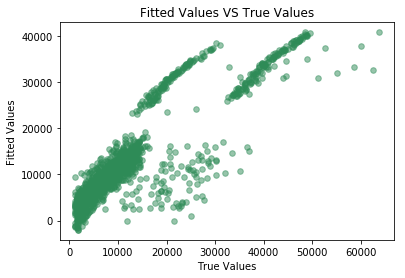

In [394]:
#Plotting Fitted Values VS True Values

import numpy as np
import matplotlib.pyplot as plt

x_axis_list = y
y_axis_list = pred_vals
colors = ('seagreen')
area = np.pi*10

plt.scatter(x_axis_list, y_axis_list, s=area, c=colors, alpha=0.5)
plt.title('Fitted Values VS True Values')
plt.xlabel('True Values')
plt.ylabel('Fitted Values')
plt.show()

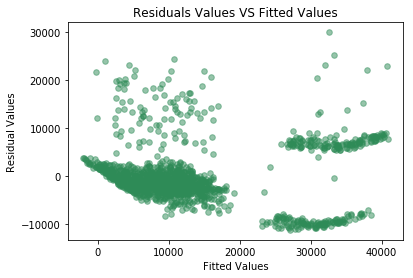

In [395]:
#Plotting Residual Values VS Fitted Values

import numpy as np
import matplotlib.pyplot as plt

x_axis_list = pred_vals
y_axis_list = residuals
colors = ('seagreen')
area = np.pi*10

plt.scatter(x_axis_list, y_axis_list, s=area, c=colors, alpha=0.5)
plt.title('Residuals Values VS Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residual Values')
plt.show()

## b) Standardization

In [396]:
#Loading Data

import pandas as pd

fpath = './insurance_data.csv'
insurance_data = pd.read_csv(fpath)

one_hot_data = pd.get_dummies(insurance_data)

x_vals = one_hot_data.loc[:, one_hot_data.columns != 'charges']
y_vals = one_hot_data.loc[:, one_hot_data.columns == 'charges']

X = x_vals.values
y = y_vals.values


In [397]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X, y)

clf = LinearRegression()
clf.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [398]:
kf = KFold(n_splits = 10)

train_rmse_list = []
test_rmse_list = []

for train_index, test_index in kf.split(X):
    #print("Train Index:", train_index)
    #print("Test Index:", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    train_rmse_list.append(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
    test_rmse_list.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

print(train_rmse_list)
print(test_rmse_list)
print("Average Training RMSE across 10-fold cross-validation:", np.mean(train_rmse_list))
print("Average Testing RMSE across 10-fold cross-validation:", np.mean(test_rmse_list))

[6051.3695241838495, 6025.560377283273, 6038.250869795185, 6019.424200492137, 6026.574940183817, 6134.549933247374, 6095.320776848486, 5932.488996633746, 6072.260130482568, 5997.623956668823]
[5976.341526998488, 6195.262808822172, 6087.498376385134, 6272.609595187517, 6213.0390518001595, 5158.0730868986975, 5545.81496853266, 6963.658229647399, 5772.909049941435, 6451.232130571957]
Average Training RMSE across 10-fold cross-validation: 6039.342370581926
Average Testing RMSE across 10-fold cross-validation: 6063.643882478563


In [399]:
pred_vals = clf.predict(X)

residuals = np.subtract(y, pred_vals)

#residuals = []
#for i in range(len(y)):
#    residuals.append(y[i] - pred_vals[i])

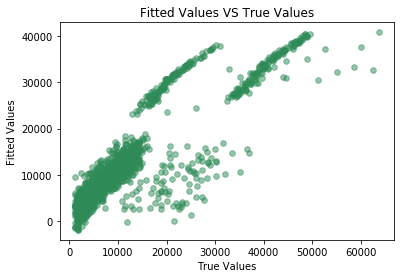

In [400]:
#Plotting Fitted Values VS True Values

import numpy as np
import matplotlib.pyplot as plt

x_axis_list = y
y_axis_list = pred_vals
colors = ('seagreen')
area = np.pi*10

plt.scatter(x_axis_list, y_axis_list, s=area, c=colors, alpha=0.5)
plt.title('Fitted Values VS True Values')
plt.xlabel('True Values')
plt.ylabel('Fitted Values')
plt.show()

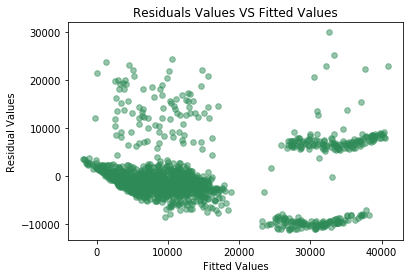

In [401]:
#Plotting Residual Values VS Fitted Values

import numpy as np
import matplotlib.pyplot as plt

x_axis_list = pred_vals
y_axis_list = residuals
colors = ('seagreen')
area = np.pi*10

plt.scatter(x_axis_list, y_axis_list, s=area, c=colors, alpha=0.5)
plt.title('Residuals Values VS Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residual Values')
plt.show()

## c) Dividing Features Further

In [402]:
#Loading Data

import pandas as pd

fpath = './insurance_data.csv'
insurance_data = pd.read_csv(fpath)

one_hot_data = pd.get_dummies(insurance_data)

x_vals = one_hot_data.loc[:, one_hot_data.columns != 'charges']
y_vals = one_hot_data.loc[:, one_hot_data.columns == 'charges']

X_features = x_vals.columns
y_features = y_vals.columns

X = x_vals.values
y = y_vals.values

print(X_features)
print(y_features)

u_2 = np.mean(X[:,1])
s_2 = np.std(X[:,1])

u_3 = np.mean(X[:,2])
s_3 = np.std(X[:,2])

for i in range(len(X)):
    
    X[i][1] = (X[i][1] - u_2) / s_2
    X[i][2] = (X[i][1] - u_3) / s_3
    
    if X[i][0] < 30:
        X[i][0] = 1
    elif X[i][0] >= 30 and X[i][0] <= 50:
        X[i][0] = 2
    else:
        X[i][0] = 3

Index(['ft1', 'ft2', 'ft3', 'ft4_female', 'ft4_male', 'ft5_no', 'ft5_yes',
       'ft6_northeast', 'ft6_northwest', 'ft6_southeast', 'ft6_southwest'],
      dtype='object')
Index(['charges'], dtype='object')


In [403]:
kf = KFold(n_splits = 10)
clf = LinearRegression()

train_rmse_list = []
test_rmse_list = []

for train_index, test_index in kf.split(X):
    #print("Train Index:", train_index)
    #print("Test Index:", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    train_rmse_list.append(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
    test_rmse_list.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print("Average Training RMSE across 10-fold cross-validation:", np.mean(train_rmse_list))
print("Average Testing RMSE across 10-fold cross-validation:", np.mean(test_rmse_list))

Average Training RMSE across 10-fold cross-validation: 6225.875133357838
Average Testing RMSE across 10-fold cross-validation: 6243.756911624101


In [404]:
pred_vals = clf.predict(X)

residuals = np.subtract(y, pred_vals)

#residuals = []
#for i in range(len(y)):
#    residuals.append(y[i] - pred_vals[i])

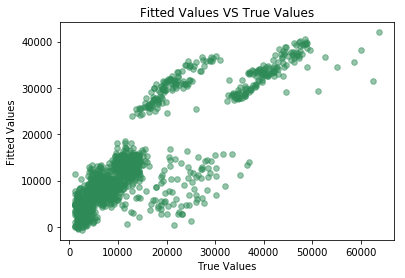

In [405]:
#Plotting Fitted Values VS True Values

import numpy as np
import matplotlib.pyplot as plt

x_axis_list = y
y_axis_list = pred_vals
colors = ('seagreen')
area = np.pi*10

plt.scatter(x_axis_list, y_axis_list, s=area, c=colors, alpha=0.5)
plt.title('Fitted Values VS True Values')
plt.xlabel('True Values')
plt.ylabel('Fitted Values')
plt.show()

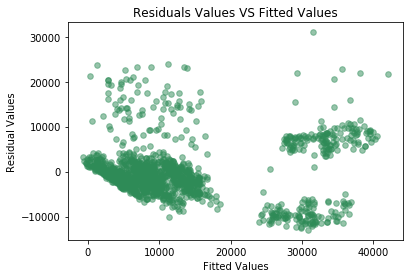

In [406]:
#Plotting Residual Values VS Fitted Values

import numpy as np
import matplotlib.pyplot as plt

x_axis_list = pred_vals
y_axis_list = residuals
colors = ('seagreen')
area = np.pi*10

plt.scatter(x_axis_list, y_axis_list, s=area, c=colors, alpha=0.5)
plt.title('Residuals Values VS Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residual Values')
plt.show()

# Question 3.2 - Correlation Exploration

In [407]:
#Loading Data

import pandas as pd

fpath = './insurance_data.csv'
insurance_data = pd.read_csv(fpath)

#print(insurance_data.dtypes)

#0 => Female; 1=> Male
insurance_data['ft4'] = insurance_data['ft4'].astype('category').cat.codes

#0 => No; 1=> Yes
insurance_data['ft5'] = insurance_data['ft5'].astype('category').cat.codes

#0 => NE; 1=> NW; 2=> SE; 3=> SW
insurance_data['ft6'] = insurance_data['ft6'].astype('category').cat.codes

#print(insurance_data)

x_vals = insurance_data.loc[:, insurance_data.columns != 'charges']
y_vals = insurance_data.loc[:, insurance_data.columns == 'charges']

X = x_vals.values
y = y_vals.values
y_arr = y
#print(len(X))
#print(len(y))

In [408]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression

y = np.ravel(y)

F, p_val = f_regression(X, y)
#print("F-score:", F)
#print("p_val:", p_val)

mi = mutual_info_regression(X, y)

best_vals_fr = sorted(range(len(F)), key=lambda i: F[i])[-2:]
best_vals_mi = sorted(range(len(mi)), key=lambda i: mi[i])[-2:]
print("The two most important measures using f_regression's F-score values are:", x_vals.columns[best_vals_fr[0]], "and", x_vals.columns[best_vals_fr[1]])
print("The two most important measures using mutual_information_regression values are:", x_vals.columns[best_vals_mi[0]], "and", x_vals.columns[best_vals_mi[1]])
#print(sorted(range(len(p_val)), key=lambda i: p_val[i])[-2:])

The two most important measures using f_regression's F-score values are: ft1 and ft5
The two most important measures using mutual_information_regression values are: ft5 and ft1


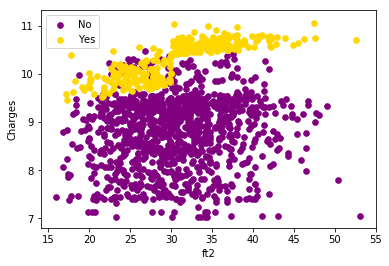

In [421]:
#Plotting Charges VS f2 (colored based on f5)

import numpy as np
import matplotlib.pyplot as plt

scatter_x = X[:,1]
scatter_y = y_arr
group = X[:,4]
cdict = {0: 'purple', 1: 'gold'}
area = np.pi*10
label_dict = {0: 'No', 1: 'Yes'}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = area)
ax.legend(label_dict.values())
plt.xlabel('ft2')
plt.ylabel('Charges')
plt.show()

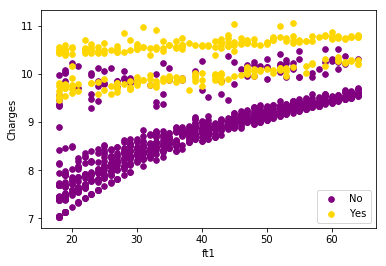

In [420]:
#Plotting Charges VS f1 (colored based on f5)

import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

scatter_x = X[:,0]
scatter_y = y_arr
group = X[:,4]
cdict = {0: 'purple', 1: 'gold'}
area = np.pi*10
label_dict = {0: 'No', 1: 'Yes'}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = area)
ax.legend(label_dict.values())
plt.xlabel('ft1')
plt.ylabel('Charges')
plt.show()

# Question 3.3 a) - Modify the Target Variable - RMSE

In [411]:
#Feature preprocessing used in 3.1a is used again 

#Loading Data
import pandas as pd

fpath = './insurance_data.csv'
insurance_data = pd.read_csv(fpath)

one_hot_data = pd.get_dummies(insurance_data)

x_vals = one_hot_data.loc[:, one_hot_data.columns != 'charges']
y_vals = one_hot_data.loc[:, one_hot_data.columns == 'charges']

X = x_vals.values
y_without_log = y_vals.values
y = np.log(y_vals.values)

#print("X:", X)
#print("y:", y)
#print("y_without_log:", y_without_log)
#print("len(X):", len(X))
#print("len(y):", len(y))

In [412]:
clf = LinearRegression()

#X_train, X_test, y_train, y_test = train_test_split(X, y)

kf = KFold(n_splits = 10)

train_rmse_list = []
test_rmse_list = []

for train_index, test_index in kf.split(X):
    #print("Train Index:", train_index)
    #print("Test Index:", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    y_train_without_log, y_test_without_log = y_without_log[train_index], y_without_log[test_index]
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    train_rmse_list.append(np.sqrt(metrics.mean_squared_error(y_train_without_log, np.exp(y_pred_train))))
    test_rmse_list.append(np.sqrt(metrics.mean_squared_error(y_test_without_log, np.exp(y_pred_test))))
print("Average Training RMSE across 10-fold cross-validation:", np.mean(train_rmse_list))
print("Average Testing RMSE across 10-fold cross-validation:", np.mean(test_rmse_list))

Average Training RMSE across 10-fold cross-validation: 8358.940954573563
Average Testing RMSE across 10-fold cross-validation: 8373.79572657205


In [413]:
clf = LinearRegression()
clf.fit(X, y)
pred_vals = clf.predict(X)
residuals = np.subtract(y_without_log, np.exp(pred_vals))

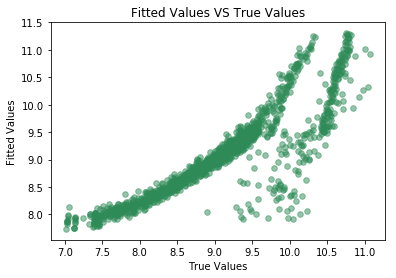

In [414]:
#Plotting Fitted Values VS True Values

import numpy as np
import matplotlib.pyplot as plt

x_axis_list = y
y_axis_list = pred_vals
colors = ('seagreen')
area = np.pi*10

plt.scatter(x_axis_list, y_axis_list, s=area, c=colors, alpha=0.5)
plt.title('Fitted Values VS True Values')
plt.xlabel('True Values')
plt.ylabel('Fitted Values')
plt.show()

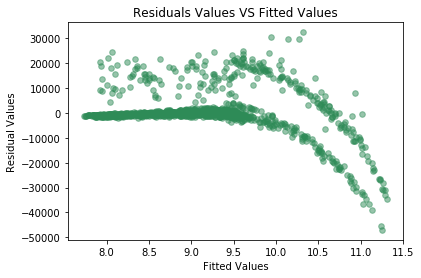

In [415]:
#Plotting Residual Values VS Fitted Values

import numpy as np
import matplotlib.pyplot as plt

x_axis_list = pred_vals
y_axis_list = residuals
colors = ('seagreen')
area = np.pi*10

plt.scatter(x_axis_list, y_axis_list, s=area, c=colors, alpha=0.5)
plt.title('Residuals Values VS Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residual Values')
plt.show()

# Question 3.3 b) - Modify the Target Variable - Correlation Exploration

In [416]:
#Loading Data

import pandas as pd

fpath = './insurance_data.csv'
insurance_data = pd.read_csv(fpath)

#print(insurance_data.dtypes)

#0 => Female; 1=> Male
insurance_data['ft4'] = insurance_data['ft4'].astype('category').cat.codes

#0 => No; 1=> Yes
insurance_data['ft5'] = insurance_data['ft5'].astype('category').cat.codes

#0 => NE; 1=> NW; 2=> SE; 3=> SW
insurance_data['ft6'] = insurance_data['ft6'].astype('category').cat.codes

#print(insurance_data)

x_vals = insurance_data.loc[:, insurance_data.columns != 'charges']
y_vals = insurance_data.loc[:, insurance_data.columns == 'charges']

X = x_vals.values
y = np.log(y_vals.values)
y_arr = y
#print(len(X))
#print(len(y))

In [417]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression

y = np.ravel(y)

F, p_val = f_regression(X, y)
#print("F-score:", F)
#print("p_val:", p_val)

mi = mutual_info_regression(X, y)

best_vals_fr = sorted(range(len(F)), key=lambda i: F[i])[-2:]
best_vals_mi = sorted(range(len(mi)), key=lambda i: mi[i])[-2:]
print("The two most important measures using f_regression's F-score values are:", x_vals.columns[best_vals_fr[0]], "and", x_vals.columns[best_vals_fr[1]])
print("The two most important measures using mutual_information_regression values are:", x_vals.columns[best_vals_mi[0]], "and", x_vals.columns[best_vals_mi[1]])
#print(sorted(range(len(p_val)), key=lambda i: p_val[i])[-2:])

The two most important measures using f_regression's F-score values are: ft1 and ft5
The two most important measures using mutual_information_regression values are: ft5 and ft1


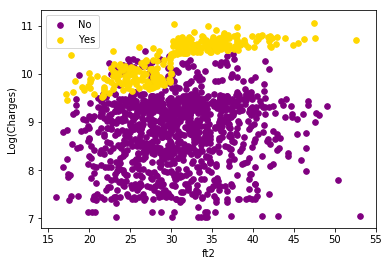

In [418]:
#Plotting Charges VS f2 (colored based on f5)

import numpy as np
import matplotlib.pyplot as plt

scatter_x = X[:,1]
scatter_y = y_arr
group = X[:,4]
cdict = {0: 'purple', 1: 'gold'}
area = np.pi*10
label_dict = {0: 'No', 1: 'Yes'}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = area)
ax.legend(label_dict.values())
plt.xlabel('ft2')
plt.ylabel('Log(Charges)')
plt.show()

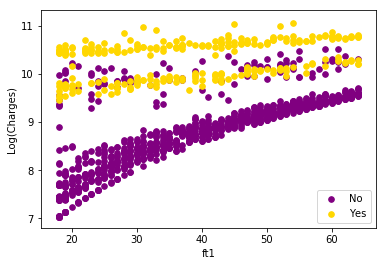

In [419]:
#Plotting Charges VS f1 (colored based on f5)

import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

scatter_x = X[:,0]
scatter_y = y_arr
group = X[:,4]
cdict = {0: 'purple', 1: 'gold'}
area = np.pi*10
label_dict = {0: 'No', 1: 'Yes'}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = area)
ax.legend(label_dict.values())
plt.xlabel('ft1')
plt.ylabel('Log(Charges)')
plt.show()